# Progetto: Analisi Diffusione COVID-19
*****

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid = pd.read_csv("/Users/lalainegubaton/python_DA/Practice/owid-covid-data.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


#### Dataset estratto dal github curato da `Our World in Data`, questi dati sono statti proveduti/raccolti dai terzi, soggetti ai propri termini di licenza.

#### Verificare le dimensioni del dataset e i relativi metadati:

In [3]:
print(f"Di seguito le dimensioni (riga, colonna) del dataset ed i metadati:")
print(covid.shape)

print(f"Nome delle colonne: {covid.columns}") 

Di seguito le dimensioni (riga, colonna) del dataset ed i metadati:
(429435, 67)
Nome delle colonne: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_f

In [4]:
covid.info()
#vediamo il tipo di dato e tot di valori non nulli per ogni colonna
#anche con .dtypes ma non fa visualizzare tutte le colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
covid.describe() 
#statistiche descrtittive

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [6]:
tot_ww = covid["total_cases"].max() 
#controllo valore max dal .describe

print(f" Totale dei casi covid globalmente registrati sono: {int(tot_ww)}.")

 Totale dei casi covid globalmente registrati sono: 775866783.


#### Per continente:
##### - Trovare il numero di casi fin dall'inizio della pandemia.
##### - Trovare la percentuale rispetto al totale mondiale del numero di casi.

In [7]:
tot_cont = covid.groupby(["continent", "location"])["total_cases"].max().groupby("continent").sum().sort_values(ascending= True)
tot_cont

continent
Africa            13145540.0
Oceania           15003352.0
South America     68809418.0
North America    124492666.0
Europe           252916868.0
Asia             301532347.0
Name: total_cases, dtype: float64

In [8]:
tot_cont_df = pd.DataFrame(tot_cont).reset_index()
tot_cont_df

,continent,total_cases
0,Africa,13145540.0
1,Oceania,15003352.0
2,South America,68809418.0
3,North America,124492666.0
4,Europe,252916868.0
5,Asia,301532347.0


In [11]:
tot_perc_cases = [] 

for case in tot_cont_df["total_cases"]: 
    cases_perc = round((case/tot_ww) * 100, 2)
    tot_perc_cases.append(cases_perc) 

tot_cont_df["total_case_percent"] = tot_perc_cases 

tot_cont_df

,continent,total_cases,total_case_percent
0,Africa,13145540.0,1.69
1,Oceania,15003352.0,1.93
2,South America,68809418.0,8.87
3,North America,124492666.0,16.05
4,Europe,252916868.0,32.60
5,Asia,301532347.0,38.86


#### Mostrare con dei grafici adeguati i dati relativi all'`Italia` nel `2022`, esclusi i giorni senza misurazioni:
##### - Evoluzione del casi totali dall'inizio alla fine dell'anno.
##### - Il numero di nuovi casi rispetto alla data.

In [28]:
covid["date"] = pd.to_datetime(covid["date"]) #traformazione in datetime
covid["date"].info() #conferma della trasformazione

<class 'pandas.core.series.Series'>
RangeIndex: 429435 entries, 0 to 429434
Series name: date
Non-Null Count   Dtype         
--------------   -----         
429435 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


In [32]:
it_2022 = covid.loc[
    (covid["date"].dt.year == 2022) & 
    (covid["location"] == "Italy") & 
    (covid["new_cases"] > 0)
]

it_2022 #df filtrato come richiesto

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178007.39,12.72,3.66,3015.1594
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472,178015.30,12.60,0.06,3015.2935
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178133.80,12.48,0.86,3017.3005


Text(0, 0.5, 'Total Cases')

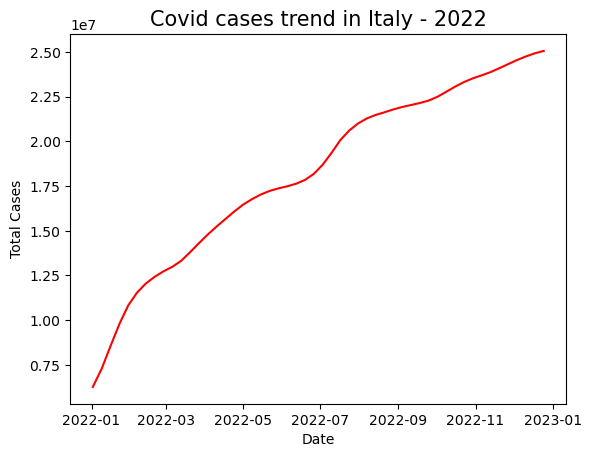

In [37]:
italia = sns.lineplot(data = it_2022, x = "date", y = "total_cases", color = "red")

italia.set_title("Covid cases trend in Italy - 2022", fontsize = 15)
italia.set_xlabel("Date")
italia.set_ylabel("Total Cases")


###### Mostra l'andamento dei casi in Italia durante il 2022, da tener conto che i dati presenti per 'total_cases' sono incrementali.

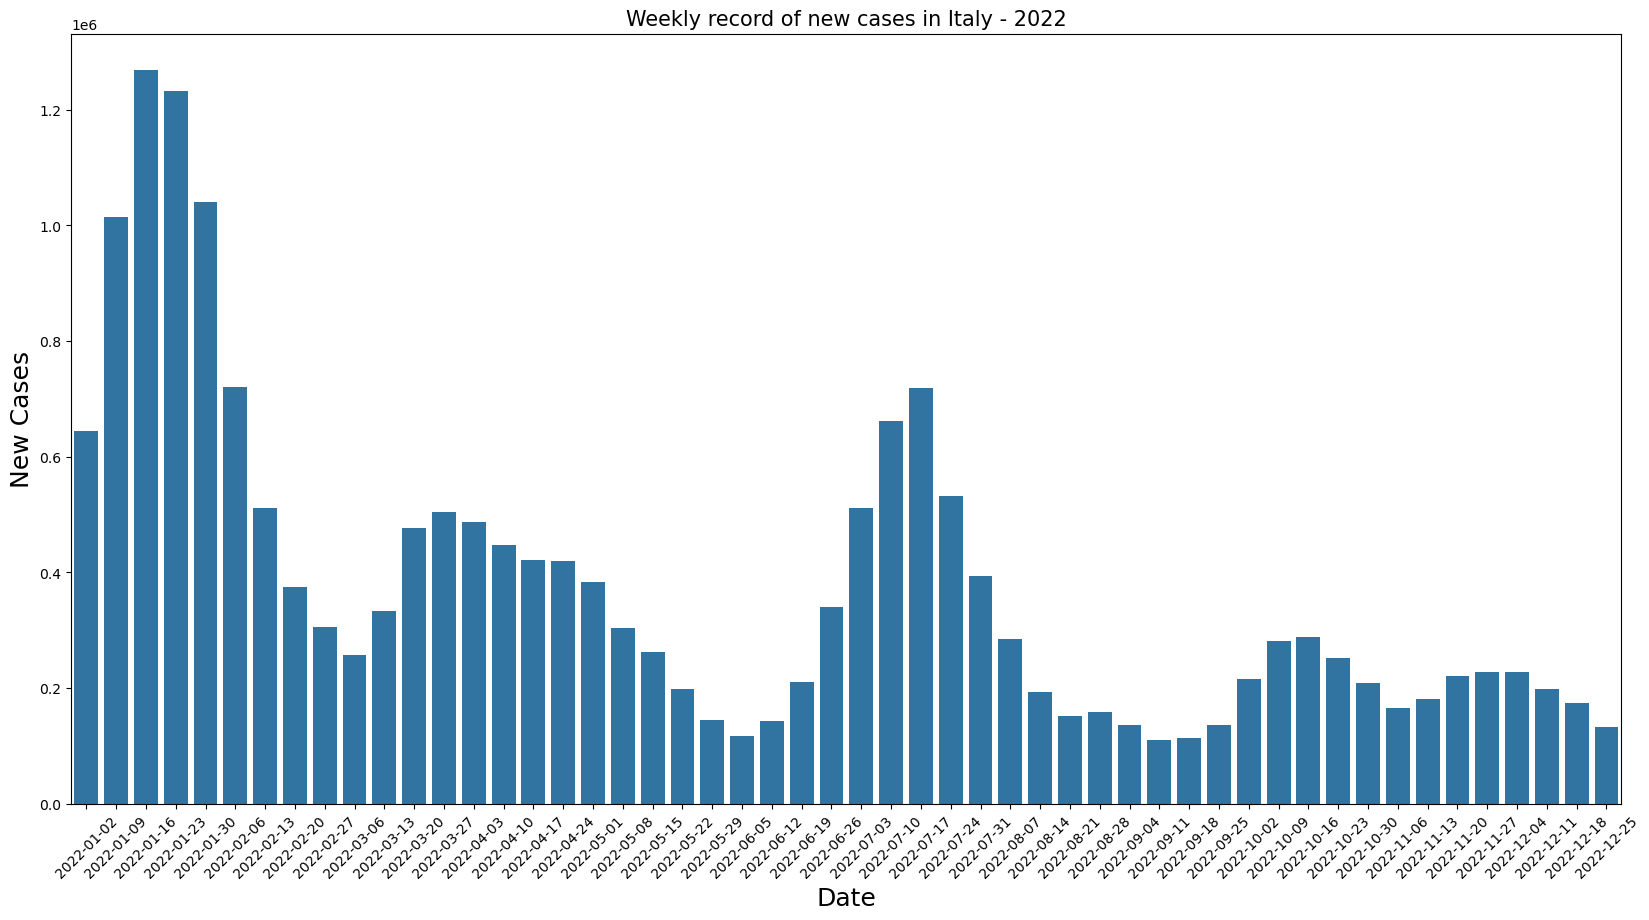

In [48]:

it_week = sns.barplot(data = it_2022, x = "date", y = "new_cases")

it_week.set_title("Weekly record of new cases in Italy - 2022", fontsize = 15)
it_week.set_xlabel("Date", fontsize = 18)
it_week.set_ylabel("New Cases", fontsize = 18)
it_week.figure.set_size_inches(20, 10)
it_week.tick_params(axis="x", rotation=45)



#### Situazione `2021`: Italia, Germania, Francia e Spagna
##### - Mostrare la somma dei pazienti ospitalizzati per ognuna ('colonna hosp_patients') - maniera grafica oppure numerica.
##### - Se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [58]:
covid["date"] = pd.to_datetime(covid["date"])

situa_2021 = covid[(covid["location"].isin(["Italy", "France", "Germany", "Spain"])) &
    (covid["date"].dt.year == 2021)] #df filtrato per paesi e anno di interesse

tot_patients = situa_2021.groupby("location")["hosp_patients"].sum().astype(int)

print(tot_patients)

location
France     6008717
Germany          0
Italy      4419950
Spain      2411706
Name: hosp_patients, dtype: int64


##### Commento sulla Germania: per causa di mancanza di dati, non è fattibile sostituirli con dati non concreti anche se 0.

#### Riguardo le nazioni di Italia, Germania e Francia:
##### - Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)


Text(0, 0.5, 'ICU Patients')

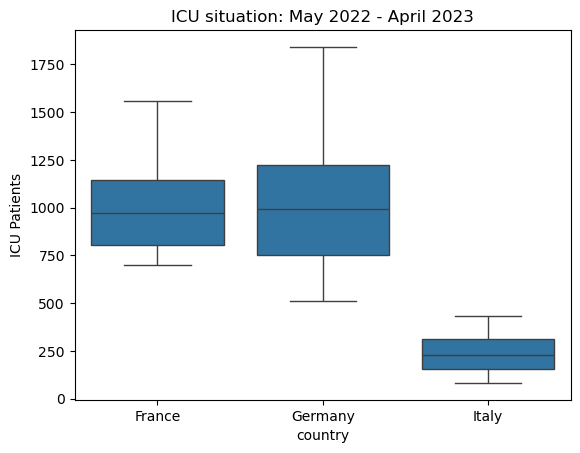

In [65]:
situa_22_23 = covid[(covid["location"].isin(["Italy", "Germany", "France"])) &
    (covid["date"] >= "2022-05-01") & (covid["date"] <= "2023-04-30")] #df filtrato per paesi e tempi di interesse

#dati nulli presenti su icu_patients

filtro_situa_22_23 = situa_22_23.dropna(subset = ["icu_patients"])

sns.boxplot(data = filtro_situa_22_23, x = 'location', y = 'icu_patients')

plt.title("ICU situation: May 2022 - April 2023")
plt.xlabel("country")
plt.ylabel("ICU Patients")


##### - Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante.

###### La Germania ha registrato più casi nelle ICU rispetto agli altri due paesi, con Francia simile mediana. Contrario per l'Italia con bassa mediana e poche casi registrati nelle unità intensiva.